In [1]:
##importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import copy
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
##Reading the data 
data=pd.read_csv('4.2 1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

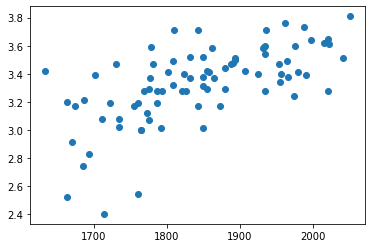

In [4]:
##Exploring our data
plt.scatter(x,y)

In [5]:
#scaling the data so as to have both inputs and targets at the same range
scaler=StandardScaler()

In [6]:
x_scaled=scaler.fit_transform(x)
y_scaled=scaler.fit_transform(y.reshape(-1,1))

In [7]:
#splitting our data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.8,random_state=44)

In [8]:
## The code below is to compute the cost function, which is the mean-squared error. i.e, the sum of differences in the predicted
## value and the actual target
def compute_cost(x,y,w,b):
    m=x.shape[0]
    total_cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost=(f_wb-y[i])**2
        cost_new=(1/(2*m))*cost
        total_cost=total_cost+cost_new
    return total_cost

In [9]:
## testing our cost function with parameters w and b, where w=slope and b is the intercept 
w=2
b=1
cost=compute_cost(x_train,y_train,w,b)
print(cost)

[1.31069685]


In [10]:
## the code to compute change in slope at different instances of parameters w and b
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dwi=(f_wb-y[i])*x[i]
        dj_dbi=(f_wb-y[i])
        dj_dw += dj_dwi
        dj_db += dj_dbi
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db

In [11]:
w_test1=0
b_test1=0
gradient=compute_gradient(x_train,y_train,w_test1,b_test1)
print(gradient)

(array([-0.95710155]), array([0.09347599]))


In [12]:
w_test2=0.2
b_test2=0.2
gradient=compute_gradient(x_train,y_train,w_test2,b_test2)
print(gradient)

(array([-0.75830421]), array([0.25625735]))


In [13]:
## code to get the best and global local minimum where w and b best fit the model. i.e, where cost function is closest to zero
def compute_descent(x,y,w_in, b_in,cost_function,gradient_function,alpha,num_iters):
    m=len(x)
    w=copy.deepcopy(w_in)
    b=b_in
    j_history=[]
    w_history=[]
    for i in range(num_iters):
        dj_dw,dj_db=gradient_function(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i < 100000:
            cost=cost_function(x,y,w,b)
            j_history.append(cost)
        if i % math.ceil(num_iters/10)==0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(j_history[-1]):8.2f}   ")
    return w, b, j_history, w_history

In [14]:
initial_w = 0.
initial_b = 0.
iterations = 3500
alpha = 0.01

w,b,_,_ = compute_descent(x_train ,y_train,initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     0.63   
Iteration  350: Cost     0.25   
Iteration  700: Cost     0.25   
Iteration 1050: Cost     0.25   
Iteration 1400: Cost     0.25   
Iteration 1750: Cost     0.25   
Iteration 2100: Cost     0.25   
Iteration 2450: Cost     0.25   
Iteration 2800: Cost     0.25   
Iteration 3150: Cost     0.25   
w,b found by gradient descent: [0.82038235] [0.05919158]


In [15]:
## predictions on the training set
m=x_train.shape[0]
predicted=np.zeros(m)
for i in range(m):
    predicted[i]=w*x_train[i]+b

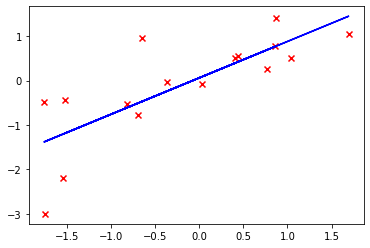

In [16]:
# visualizing the predicted values and getting the best line of fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r')

    Now, we've seen the codes and those codes are what we can call the 'backend'. These are the codes that are running when we import the modules and libraries
    The following lines of code will show you we are going to get the same results intuitively for parameters w and b.

In [17]:
reg=LinearRegression()

In [18]:
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
reg.coef_

array([[0.82038235]])

In [20]:
reg.intercept_

array([0.05919158])

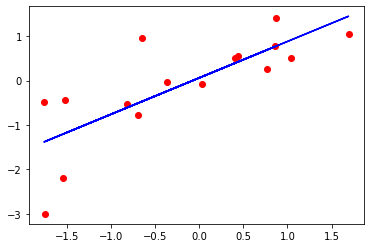

In [21]:
plt.plot(x_train,reg.predict(x_train), c='b')
plt.scatter(x_train,y_train, c='r')

# The linear regression equation
y=b0+w*x
where x is the input, b0 is intercept and w is the slope. we've gotten our w and b to be ~ 0.82 and 0.06 respectively.
Therefore, the following equation can be written as:
y=0.06+0.82*x

Imagine a student wanting to know his/her gpa from her SAT scores and she inputs 2002. Note, we will have to scale 2002 as our w and b are results of scaled methods.

In [28]:
new_x=np.array(2002)

In [31]:
new_scaled_x=scaler.fit_transform(new_x.reshape(-1,1))
print(new_scaled_x)

[[0.]]


In [32]:
y=0.6+(0.82*new_scaled_x)
print(y)

[[0.6]]
